# Initialization
This file connects to the un-normalized Enrollment Data and performs some basic EDA on the data.

In [1]:
# importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir( os.path.join("..", "..", "..") )

from Code.src.modules.db_ops import *

# Importing the Data
## SQL Database
Using enrollment4EDA.db as the database file

In [2]:
# configuring the sql connection and query execution
db_enrollment = ConnectDB( os.path.join("Data", "02_processed", "enrollment4EDA.db") )

In [3]:
# example test query
db_enrollment.runQuery("""
    SELECT rec_id, stu_id
    FROM enrollment4EDA
    LIMIT 5;
""")

,rec_id,stu_id
0,0,CEC3286
1,1,CEC3289
2,2,CEC865
3,3,CEC865
4,4,CEC901


## Pandas Dataframe

In [4]:
df_enrollment = pd.read_pickle( os.path.join("Data", "02_processed", "enrollment.pkl") )

In [5]:
df_enrollment.head()

,rec_id,rec_ext_date,file_name,file_index,reg_term_code,reg_term_year,reg_term_name,reg_term_desc,stu_id,stu_deg_level,...,crs_type,crs_credits,crs_hours,crs_sect,crs_sect_clg,crs_sect_modality,crs_sect_wiley_ind,reg_status,reg_status_date,stu_act_reg_ind
0,0,2017-05-01,Data/01_raw/EnrollmentData/CEC Graduate Regist...,5,201770,2017,Fall,Fall 2017,CEC3286,Master,...,Lecture,3,3.0,INFS 640 001,VSE,F2F,No Value,**Web Registered**,2017-04-11,Y
1,1,2017-05-01,Data/01_raw/EnrollmentData/CEC Graduate Regist...,6,201770,2017,Fall,Fall 2017,CEC3289,Master,...,Lecture,3,3.0,SWE 619 002,VSE,F2F,No Value,**Web Registered**,2017-04-11,Y
2,2,2017-05-01,Data/01_raw/EnrollmentData/CEC Graduate Regist...,10,201770,2017,Fall,Fall 2017,CEC865,Master,...,Lecture,3,3.0,CEIE 639 001,VSE,F2F,No Value,**Web Registered**,2017-04-11,Y
3,3,2017-05-01,Data/01_raw/EnrollmentData/CEC Graduate Regist...,11,201770,2017,Fall,Fall 2017,CEC865,Master,...,Lecture,3,3.0,CEIE 679 001,VSE,F2F,No Value,**Web Registered**,2017-04-11,Y
4,4,2017-05-01,Data/01_raw/EnrollmentData/CEC Graduate Regist...,12,201770,2017,Fall,Fall 2017,CEC901,Master,...,Lecture,3,3.0,SWE 645 001,VSE,F2F,No Value,**Web Registered**,2017-04-11,Y


# EDA

In [17]:
df_professor = pd.read_pickle( os.path.join("Data", "02_processed", "professor.pkl") )

In [26]:
df_enrollment.head().T

,0,1,2,3,4
rec_id,0,1,2,3,4
rec_ext_date,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00
file_name,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...
file_index,5,6,10,11,12
reg_term_code,201770,201770,201770,201770,201770
reg_term_year,2017,2017,2017,2017,2017
reg_term_name,Fall,Fall,Fall,Fall,Fall
reg_term_desc,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017
stu_id,CEC3286,CEC3289,CEC865,CEC865,CEC901
stu_deg_level,Master,Master,Master,Master,Master


In [7]:
df_enrollment.columns

Index(['rec_id', 'rec_ext_date', 'file_name', 'file_index', 'reg_term_code',
       'reg_term_year', 'reg_term_name', 'reg_term_desc', 'stu_id',
       'stu_deg_level', 'stu_college', 'stu_res', 'stu_visa', 'stu_bam',
       'stu_new_ret', 'stu_dept', 'stu_dept_desc', 'stu_prog_code',
       'stu_prog_level', 'stu_prog_desc', 'stu_admit_term_code',
       'stu_admit_term_year', 'stu_admit_term_name', 'stu_admit_term_desc',
       'crs', 'crs_type', 'crs_credits', 'crs_hours', 'crs_sect',
       'crs_sect_clg', 'crs_sect_modality', 'crs_sect_wiley_ind', 'reg_status',
       'reg_status_date', 'stu_act_reg_ind'],
      dtype='object')

In [10]:
# creating a frequency distribution table for the column 'stu_res'
df_enrollment['stu_res'].value_counts()

OOS    201805
VA     142314
Name: stu_res, dtype: int64

<Axes: >

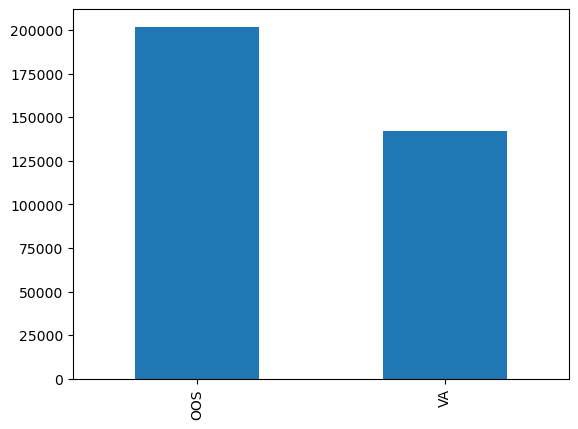

In [11]:
# creating a frequency distribution table for the column 'stu_res'
df_enrollment['stu_res'].value_counts().plot(kind='bar')

<Axes: >

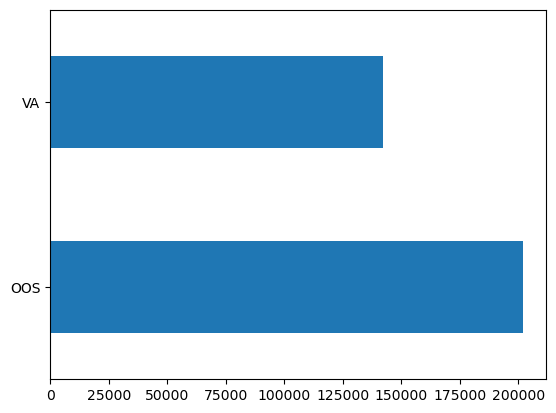

In [12]:
# creating a frequency distribution table for the column 'stu_res'
df_enrollment['stu_res'].value_counts().plot(kind='barh')

<Axes: title={'center': 'Residence of Students'}, ylabel='Residence'>

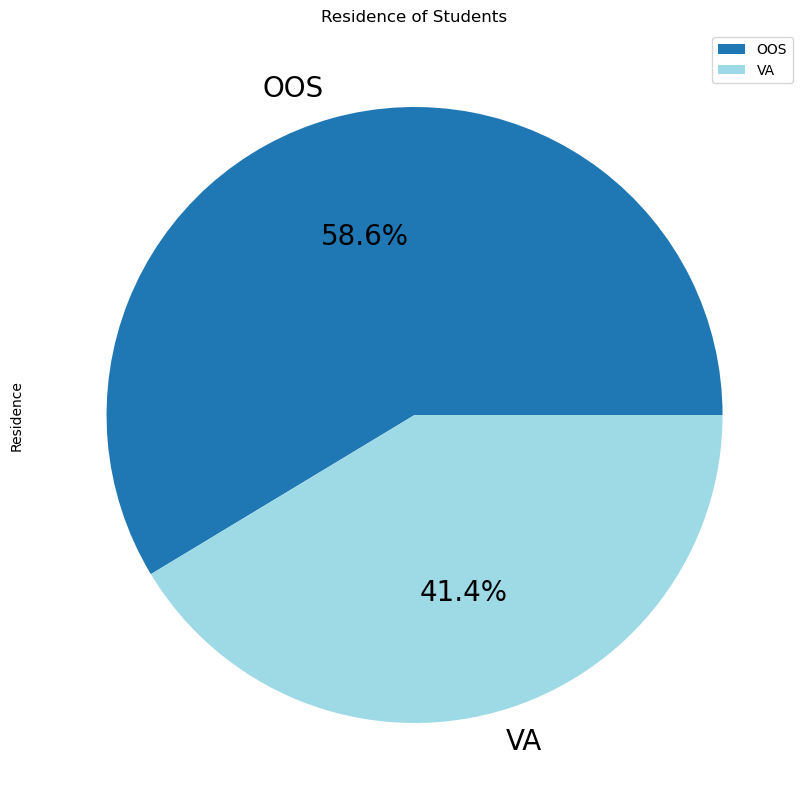

In [14]:
# creating a frequency distribution table for the column 'stu_res'
df_enrollment['stu_res'].value_counts().plot(
    kind='pie', autopct='%1.1f%%',
    figsize=(10,10), fontsize=20,
    legend=True, title='Residence of Students', label='', ylabel='Residence', xlabel='Students',
    colormap='tab20'
)

In [33]:
db_enrollment.runQuery("""
    SELECT stu_admit_term_year, stu_admit_term_name, COUNT(DISTINCT stu_id) AS stu_count
    FROM enrollment4EDA
    WHERE
        stu_admit_term_year >= 2017
        AND stu_prog_desc = 'MS Data Analytics Engineering'
    GROUP BY stu_admit_term_year, stu_admit_term_name;
""")

,stu_admit_term_year,stu_admit_term_name,stu_count
0,2017,Fall,119
1,2017,Spring,45
2,2018,Fall,143
3,2018,Spring,102
4,2019,Fall,173
5,2019,Spring,124
6,2019,Summer,9
7,2020,Fall,171
8,2020,Spring,113
9,2020,Summer,12


In [6]:
db_enrollment.runQuery("""
    SELECT stu_id, crs, reg_status, COUNT(stu_id) as num
    FROM enrollment4EDA
    WHERE
        stu_admit_term_year = 2023          AND
        stu_admit_term_name = "Spring"      AND
        rec_ext_date = "2023-02-15 00:00:00" AND
        crs = "CS 580"
    GROUP BY stu_id, crs, reg_status
    ORDER BY num DESC;
""")

,stu_id,crs,reg_status,num
0,CEC1649,CS 580,**Web Registered**,1
1,CEC17323,CS 580,**Web Registered**,1
2,CEC20235,CS 580,**Web Registered**,1
3,CEC30373,CS 580,**Web Registered**,1
4,CEC31119,CS 580,**Web Registered**,1
5,CEC31284,CS 580,**Web Registered**,1
6,CEC32139,CS 580,**Web Registered**,1
7,CEC32392,CS 580,**Web Registered**,1
8,CEC32418,CS 580,**Web Registered**,1
9,CEC32512,CS 580,**Web Registered**,1


In [35]:
df_professor.head().T

,0,1,2,3,4
rec_id,0,1,2,3,4
reg_term_code,201670,201670,201670,201670,201670
reg_term_year,2016,2016,2016,2016,2016
reg_term_name,Fall,Fall,Fall,Fall,Fall
reg_term_desc,Fall 2016,Fall 2016,Fall 2016,Fall 2016,Fall 2016
crs,BENG 101,BENG 101,BENG 101,BENG 101,BENG 101
crs_sect,BENG 101 001,BENG 101 002,BENG 101 301,BENG 101 302,BENG 101 DG1
crs_sect_clg,VSE,VSE,VSE,VSE,VSE
crs_sect_camp,Fairfax,Fairfax,Fairfax,Fairfax,Online
crs_sect_dept,BENG,BENG,BENG,BENG,BENG


In [36]:
db_professor = ConnectDB( os.path.join("Data", "02_processed", "professor4EDA.db") )

## Getting the number of students enrolling/waitlisting in a particular course and a particular semester

In [48]:
# Using Professor Data
db_professor.runQuery("""
    SELECT reg_term_year, reg_term_name, crs, SUM(crs_sect_enroll_avail) + SUM(crs_sect_enroll_count) as Available_Seats,
    SUM(crs_sect_enroll_count) as Enrollment, SUM(crs_sect_enroll_waitlist) as Waitlist,
    SUM(crs_sect_enroll_count) + SUM(crs_sect_enroll_waitlist) as Total_Demand
    FROM professor4EDA
    GROUP BY reg_term_year, reg_term_name, crs
    HAVING crs = "AIT 580";
""")

,reg_term_year,reg_term_name,crs,Available_Seats,Enrollment,Waitlist,Total_Demand
0,2016,Fall,AIT 580,98,80,0,80
1,2017,Fall,AIT 580,141,118,0,118
2,2017,Spring,AIT 580,85,76,0,76
3,2017,Summer,AIT 580,55,28,0,28
4,2018,Fall,AIT 580,197,161,0,161
5,2018,Spring,AIT 580,149,114,0,114
6,2018,Summer,AIT 580,60,47,0,47
7,2019,Fall,AIT 580,203,142,0,142
8,2019,Spring,AIT 580,172,100,0,100
9,2019,Summer,AIT 580,90,54,0,54


In [50]:
df_enrollment.reg_status.unique().tolist()

['**Web Registered**',
 'Wait Listed',
 'Drop-Course Cancelled',
 '**Registered**',
 'Drop/Delete',
 'Web Drop (Liability)',
 'Web Withdrawal',
 'Withdrawal from Course',
 'Selective Withdrawal Exception',
 'Registered for Audit']

In [63]:
db_enrollment.runQuery("""
    SELECT reg_term_year, reg_term_name, crs, COUNT(DISTINCT stu_id) as Wailisted
    FROM enrollment4EDA
    WHERE reg_status IN ('Wait Listed')
    GROUP BY reg_term_year, reg_term_name, crs
    HAVING crs = "AIT 524";
""")

,reg_term_year,reg_term_name,crs,Wailisted
0,2017,Fall,AIT 524,6
1,2018,Fall,AIT 524,20
2,2018,Spring,AIT 524,33
3,2019,Fall,AIT 524,19
4,2019,Spring,AIT 524,38
5,2020,Fall,AIT 524,11
6,2020,Spring,AIT 524,25
7,2021,Fall,AIT 524,21
8,2021,Spring,AIT 524,4
9,2022,Fall,AIT 524,17


In [64]:
# Using Enrollment Data
db_enrollment.runQuery("""
    SELECT reg_term_year, reg_term_name, crs, COUNT(DISTINCT stu_id) as Enrollment
    FROM enrollment4EDA
    WHERE reg_status IN ('**Web Registered**', '**Registered**')
    GROUP BY reg_term_year, reg_term_name, crs
    HAVING crs = "AIT 524";
""")

,reg_term_year,reg_term_name,crs,Enrollment
0,2017,Fall,AIT 524,51
1,2018,Fall,AIT 524,114
2,2018,Spring,AIT 524,99
3,2019,Fall,AIT 524,93
4,2019,Spring,AIT 524,118
5,2020,Fall,AIT 524,109
6,2020,Spring,AIT 524,99
7,2021,Fall,AIT 524,121
8,2021,Spring,AIT 524,63
9,2022,Fall,AIT 524,135


In [58]:
db_enrollment.runQuery("""
    SELECT crs, stu_id, COUNT(DISTINCT reg_status) as num
    FROM enrollment4EDA
    GROUP BY crs, stu_id
    ORDER BY num DESC;
""")

,crs,stu_id,num
0,AIT 524,CEC11201,4
1,CEIE 679,CEC1199,4
2,CEIE 679,CEC4055,4
3,CS 550,CEC28105,4
4,CS 584,CEC26154,4
...,...,...,...
51975,VSE 794,CEC20504,1
51976,VSE 794,CEC20519,1
51977,VSE 794,CEC20665,1
51978,VSE 794,CEC21133,1


In [76]:
db_enrollment.runQuery("""
    SELECT reg_term_code, reg_term_desc, stu_id, rec_ext_date, reg_status_date, crs, crs_sect, reg_status
    FROM enrollment4EDA
    WHERE
        stu_id = "CEC11201" AND
        crs = "AIT 697"
    ORDER BY rec_ext_date, reg_status_date;
""")

,reg_term_code,reg_term_desc,stu_id,rec_ext_date,reg_status_date,crs,crs_sect,reg_status
0,201770,Fall 2017,CEC11201,2017-01-01 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
1,201770,Fall 2017,CEC11201,2017-05-01 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
2,201770,Fall 2017,CEC11201,2017-05-15 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
3,201770,Fall 2017,CEC11201,2017-06-01 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
4,201770,Fall 2017,CEC11201,2017-06-15 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
5,201770,Fall 2017,CEC11201,2017-07-01 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
6,201770,Fall 2017,CEC11201,2017-08-01 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
7,201770,Fall 2017,CEC11201,2017-08-15 00:00:00,2017-05-01 00:00:00,AIT 697,AIT 697 DL1,Wait Listed
8,201810,Spring 2018,CEC11201,2017-11-08 00:00:00,2017-11-07 00:00:00,AIT 697,AIT 697 DL1,**Web Registered**
9,201810,Spring 2018,CEC11201,2017-11-15 00:00:00,2017-11-07 00:00:00,AIT 697,AIT 697 DL1,**Web Registered**


In [73]:
db_enrollment.runQuery("""
    SELECT *
    FROM enrollment4EDA
    WHERE
        stu_id = "CEC11201" AND
        crs = "AIT 673"
    ORDER BY rec_ext_date, reg_status_date;
""").T

,0,1,2,3,4,5,6,7,8,9
rec_id,23273,1689,3768,5713,7932,10213,12643,15259,17763,20329
rec_ext_date,2017-01-01 00:00:00,2017-05-01 00:00:00,2017-05-15 00:00:00,2017-06-01 00:00:00,2017-06-15 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-08-15 00:00:00,2017-09-01 00:00:00,2017-09-15 00:00:00
file_name,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...,Data/01_raw/EnrollmentData/CEC Graduate Regist...
file_index,1490,1375,1375,1441,1463,1476,1522,1488,1424,1369
reg_term_code,201770,201770,201770,201770,201770,201770,201770,201770,201770,201770
reg_term_year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
reg_term_name,Fall,Fall,Fall,Fall,Fall,Fall,Fall,Fall,Fall,Fall
reg_term_desc,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017
stu_id,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201,CEC11201
stu_deg_level,Master,Master,Master,Master,Master,Master,Master,Master,Master,Master


## Final Enrollment Status of all Students throughout his/her time at the University

In [79]:
df_enrollmentFinalStatus = db_enrollment.runQuery("""
    SELECT reg_term_code, reg_term_desc, stu_id, crs, MAX(reg_status_date) as final_reg_date, reg_status
    FROM enrollment4EDA
    GROUP BY reg_term_code, reg_term_desc, stu_id, crs
    ORDER BY final_reg_date;
""")

df_enrollmentFinalStatus

,reg_term_code,reg_term_desc,stu_id,crs,final_reg_date,reg_status
0,201770,Fall 2017,CEC100,AIT 622,2017-04-11 00:00:00,**Web Registered**
1,201770,Fall 2017,CEC10011,TCOM 515,2017-04-11 00:00:00,**Web Registered**
2,201770,Fall 2017,CEC10011,TCOM 631,2017-04-11 00:00:00,**Web Registered**
3,201770,Fall 2017,CEC10012,OR 538,2017-04-11 00:00:00,**Web Registered**
4,201770,Fall 2017,CEC10012,SYST 542,2017-04-11 00:00:00,**Web Registered**
...,...,...,...,...,...,...
59404,202310,Spring 2023,CEC23433,CEC 794,2023-02-09 00:00:00,**Registered**
59405,202310,Spring 2023,CEC26826,CS 678,2023-02-09 00:00:00,**Registered**
59406,202310,Spring 2023,CEC27498,INFS 580,2023-02-09 00:00:00,**Registered**
59407,202310,Spring 2023,CEC27967,CS 504,2023-02-09 00:00:00,**Web Registered**


In [80]:
# Exporting the final status of the students
df_enrollmentFinalStatus.to_csv( os.path.join("Data", "02_processed", "enrollmentFinalStatus.csv"), index=False )
df_enrollmentFinalStatus.to_pickle( os.path.join("Data", "02_processed", "enrollmentFinalStatus.pkl") )

db_enrollmentFinalStatus = ConnectDB( os.path.join("Data", "02_processed", "enrollmentFinalStatus.db") )
df_enrollmentFinalStatus.to_sql("enrollmentFinalStatus", db_enrollmentFinalStatus.connection, if_exists="replace", index=False)

59409